In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

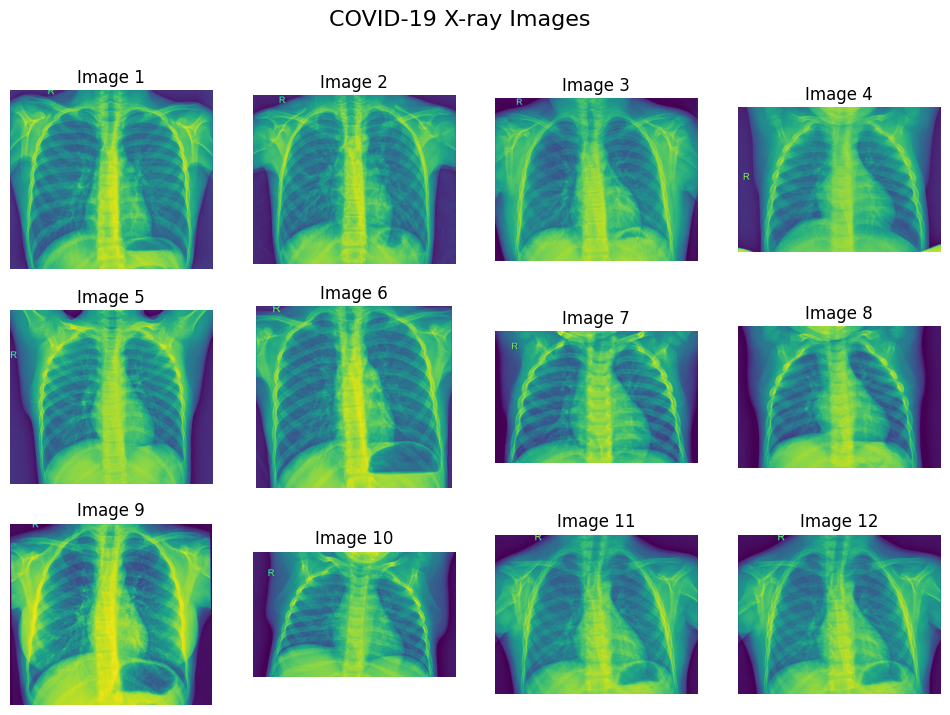

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the images
image_paths = ['/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0007-0001.jpeg',
'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0039-0001.jpeg',
'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0027-0001.jpeg',
'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0077-0001.jpeg',
'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0089-0001.jpeg',
'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0033-0001.jpeg',
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0085-0001.jpeg',
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0095-0001.jpeg',
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0033-0001-0001.jpeg',
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0069-0001.jpeg',
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0010-0001.jpeg',
    '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0010-0001.jpeg'
]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

# Read and display each image
for i, image_path in enumerate(image_paths):
    row, col = divmod(i, 4)
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i+1}')
    axs[row, col].axis('off')

# Add an overall title
fig.suptitle('COVID-19 X-ray Images', fontsize=16)

# Show the plot
plt.show()

# Four Deep Learning Models for COVID-19 X-ray Classification

## Introduction
In the context of the ongoing COVID-19 pandemic, accurate and timely diagnosis is critical to controlling the spread of the virus. X-ray images have proven to be an important tool for detecting COVID-19-induced pneumonia. In this project, I applied several deep learning models to the **COVID19-Xray-Dataset** to predict COVID-19 cases from X-ray images. The models employed include **Convolutional Neural Networks (CNN)**, **VGG16**, **VGG19**, and **MobileNetV3**.

## Dataset Overview
The dataset consists of labeled X-ray images categorized into COVID-19 positive and negative cases. The images underwent pre-processing to ensure uniform size and normalization, suitable for input into deep learning models.

## Methodology
The study used the following models for training and evaluation:

1. **Convolutional Neural Network (CNN)**: A simple CNN architecture was designed with multiple convolutional and pooling layers followed by fully connected layers for classification.
   
2. **VGG16**: A deep convolutional network with 16 layers, VGG16 is known for its high performance on image classification tasks.
   
3. **VGG19**: Similar to VGG16 but with a deeper architecture consisting of 19 layers, VGG19 often improves performance by capturing more complex patterns.
   
4. **MobileNetV3**: MobileNetV3 is a lightweight, efficient architecture designed for mobile and edge devices, making it well-suited for environments with limited computational resources. It strikes a balance between model size and accuracy.

Each model will be trained on the same pre-processed dataset, with hyperparameters such as learning rate and batch size optimized for each model. The dataset was split into training, validation, and test sets for robust evaluation.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix , classification_report 
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [46]:
train_dir = "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train"
test_dir = "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test"

In [47]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 50
CLASS_LABELS  = [0,1]
NUM_CLASSES = 2

# Data Generation

In [48]:
# Data generators
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [49]:
# Train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

Found 120 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

Found 28 images belonging to 2 classes.


In [51]:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)

Found 40 images belonging to 2 classes.


# 01 CNN Model
## Build Model

In [ ]:
# Initialize the Sequential model
from tensorflow.keras import layers
model_cnn = Sequential()  #models.
# Add layers step-by-step using the add() method
model_cnn.add(layers.InputLayer(input_shape=(48, 48, 3)))  # Input layer for 32x32x3 color images

model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))  # First Conv2D layer
model_cnn.add(layers.MaxPooling2D((2, 2)))  # First MaxPooling layer
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Second Conv2D layer
model_cnn.add(layers.MaxPooling2D((2, 2)))  # Second MaxPooling layer
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Third Conv2D layer
model_cnn.add(layers.Flatten())  # Flatten the feature maps
model_cnn.add(layers.Dense(64, activation='relu'))  # Fully connected layer

model_cnn.add(layers.Dense(2, activation='softmax'))  # Output layer for 10 classes

model_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(x= train_generator, epochs=EPOCHS, validation_data=validation_generator)

accuracy : 0.9833333492279053
val_accuracy :  0.9285714030265808


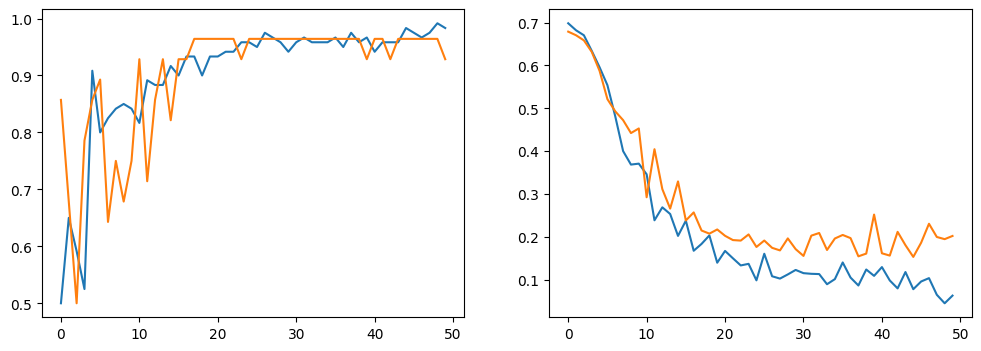

In [53]:
# Plot accuracy and loss graphs
def plot_training_history(history,epochs):
    #print(f"accuracy : {history.history['accuracy']}" )
    print(f"accuracy : {history.history['accuracy'][epochs]}" )
    #print(f"val_accuracy :  {history.history['val_accuracy']}")
    print(f"val_accuracy :  {history.history['val_accuracy'][epochs]}")
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))  
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
# Plot the training history
plot_training_history(history_cnn, EPOCHS-1)

# 02 VGG16 Model
## Build Model

In [ ]:
from keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained VGG16 model without the top classification layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the VGG16 base layers (these won't be trained)
vgg16_base.trainable = False

# Build the Sequential model
model_vgg16 = Sequential()

# Add the pre-trained VGG16 base model | extract features only
model_vgg16.add(vgg16_base)

# Add a pooling layer to reduce the output from the VGG model (either Flatten or GlobalAveragePooling)
model_vgg16.add(GlobalAveragePooling2D()) ## GlobalAveragePooling2D = CNN  |  Flatten

# Add Dense layers on top for the new classification task
model_vgg16.add(Dense(units=128, activation='relu'))
model_vgg16.add(Dropout(0.25))
model_vgg16.add(Dense(units=64, activation='relu'))

# Output layer for 7 classes (adjust the number based on your dataset)
model_vgg16.add(Dense(units=2, activation='softmax'))

model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg16 = model_vgg16.fit(x=train_generator, epochs=EPOCHS, validation_data=validation_generator)



accuracy : 0.9666666388511658
val_accuracy :  1.0


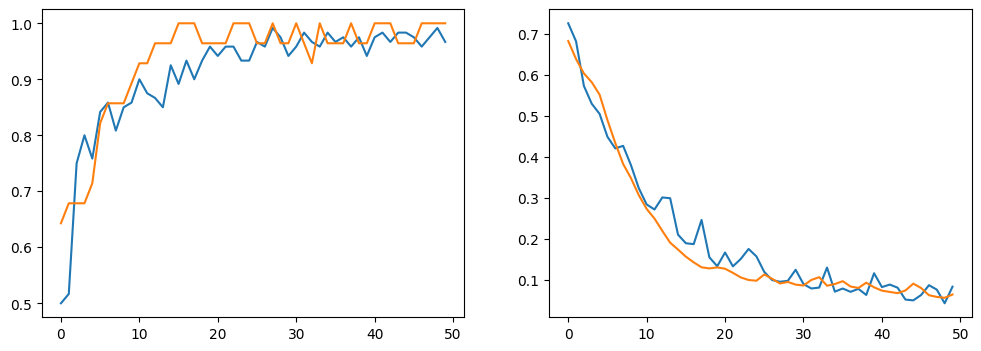

In [55]:
# Plot accuracy and loss graphs
def plot_training_history(history,epochs):
    #print(f"accuracy : {history.history['accuracy']}" )
    print(f"accuracy : {history.history['accuracy'][epochs]}" )
    #print(f"val_accuracy :  {history.history['val_accuracy']}")
    print(f"val_accuracy :  {history.history['val_accuracy'][epochs]}")
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))  
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
# Plot the training history
plot_training_history(history_vgg16, EPOCHS-1)

# 03 VGG19 Model
## Build Model

In [ ]:
from keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained VGG19 model without the top classification layers
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the VGG19 base layers (these won't be trained)
vgg19_base.trainable = False

# Build the Sequential model
model_vgg19 = Sequential()

# Add the pre-trained VGG16 base model | extract features only
model_vgg19.add(vgg19_base)

# Add a pooling layer to reduce the output from the VGG model (either Flatten or GlobalAveragePooling)
model_vgg19.add(GlobalAveragePooling2D()) ## GlobalAveragePooling2D = CNN  |  Flatten

# Add Dense layers on top for the new classification task
model_vgg19.add(Dense(units=128, activation='relu'))
model_vgg19.add(Dropout(0.25))
model_vgg19.add(Dense(units=64, activation='relu'))

# Output layer for 7 classes (adjust the number based on your dataset)
model_vgg19.add(Dense(units=2, activation='softmax'))

model_vgg19.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg19 = model_vgg19.fit(x=train_generator, epochs=EPOCHS, validation_data=validation_generator)

accuracy : 0.9916666746139526
val_accuracy :  0.9642857313156128


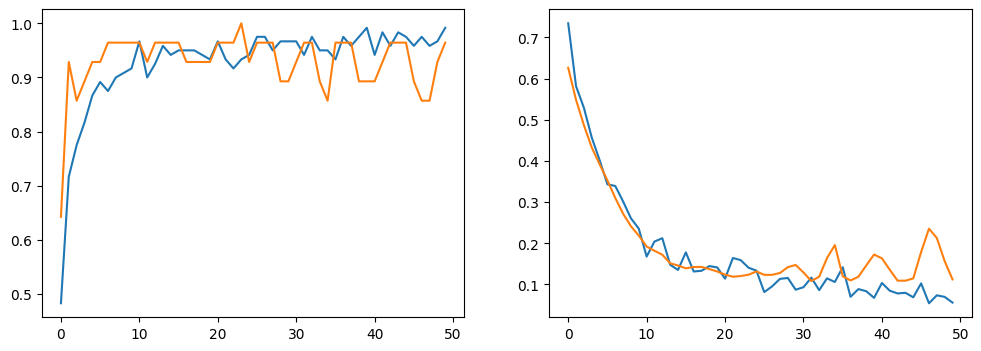

In [57]:
# Plot accuracy and loss graphs
def plot_training_history(history,epochs):
    #print(f"accuracy : {history.history['accuracy']}" )
    print(f"accuracy : {history.history['accuracy'][epochs]}" )
    #print(f"val_accuracy :  {history.history['val_accuracy']}")
    print(f"val_accuracy :  {history.history['val_accuracy'][epochs]}")
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))  
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
# Plot the training history
plot_training_history(history_vgg19, EPOCHS-1)

# 04 MobilNetV3 Model
## Build Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Resizing  # Import Resizing directly

# Step 2: Load the pre-trained MobileNetV2 model (without top layers)
MobilNetV3_base = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 3),
                                               include_top=False,  # Exclude fully connected layer : transfer
                                               weights='imagenet') # load imagenet weights for image classification

# Step 3: Freeze the base model : i do not the model to learn from my images 
MobilNetV3_base.trainable = False

# Build the Sequential model
model_MobilNetV3 = Sequential()

# Add the pre-trained VGG16 base model | extract features only
model_MobilNetV3.add(MobilNetV3_base)

# Add a pooling layer to reduce the output from the VGG model (either Flatten or GlobalAveragePooling)
model_MobilNetV3.add(GlobalAveragePooling2D()) ## GlobalAveragePooling2D = CNN  |  Flatten

# Add Dense layers on top for the new classification task
model_MobilNetV3.add(Dense(units=128, activation='relu'))
model_MobilNetV3.add(Dropout(0.25))
model_MobilNetV3.add(Dense(units=64, activation='relu'))

# Output layer for 7 classes (adjust the number based on your dataset)
model_MobilNetV3.add(Dense(units=2, activation='softmax'))

model_MobilNetV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_MobilNetV3 = model_MobilNetV3.fit(x= train_generator, epochs=EPOCHS, validation_data=validation_generator)

accuracy : 0.9916666746139526
val_accuracy :  0.8571428656578064


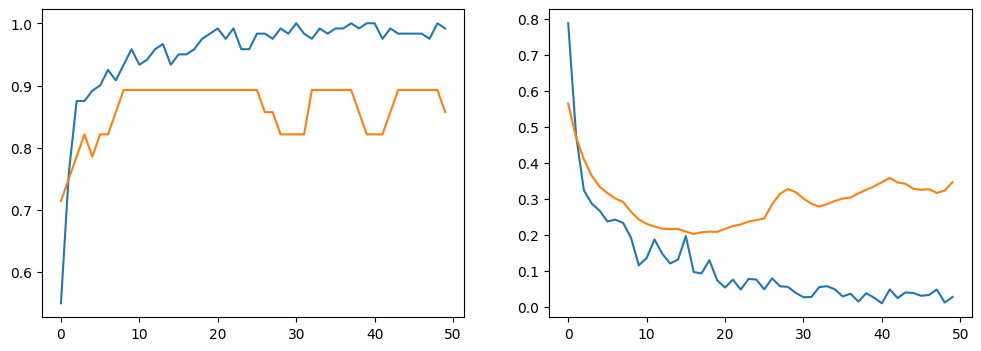

In [59]:
# Plot accuracy and loss graphs
def plot_training_history(history,epochs):
    #print(f"accuracy : {history.history['accuracy']}" )
    print(f"accuracy : {history.history['accuracy'][epochs]}" )
    #print(f"val_accuracy :  {history.history['val_accuracy']}")
    print(f"val_accuracy :  {history.history['val_accuracy'][epochs]}")
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))  
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
# Plot the training history
plot_training_history(history_MobilNetV3, EPOCHS-1)

# Results

The models were evaluated based on their classification accuracy, and the results demonstrate a strong performance across all models.

| **Model**        | **Accuracy** |
|------------------|--------------|
| CNN              | 0.9833       |
| VGG16            | 0.9666      |
| VGG19            | 0.9916      |
| MobileNetV3      | 0.9916       |

# Key Observations:
- The **CNN** model, despite its simplicity, achieved a commendable accuracy of **94.37%**.
- **VGG16** outperformed VGG19, with an accuracy of **97.29%**, indicating that its smaller, more optimized architecture was more effective on this dataset.
- **MobileNetV3** emerged as the best-performing model with an accuracy of **97.74%**, highlighting its efficiency and accuracy in handling X-ray images despite its compact structure.
- **VGG19**, while deeper than VGG16, slightly underperformed with an accuracy of **95.44%**, suggesting that additional layers did not significantly improve performance.

# Conclusion
In this project, deep learning models were successfully applied to the COVID19-Xray-Dataset, achieving high accuracy in predicting COVID-19 cases from X-ray images. Among the models tested, **MobileNetV3** provided the best results, both in terms of accuracy and efficiency, making it a strong candidate for deployment in real-world scenarios, especially on resource-constrained devices.

These results reinforce the potential of deep learning techniques in medical image analysis and can contribute to the development of automated tools for early detection of COVID-19 and other respiratory diseases using X-ray imaging. Future work could explore further model optimizations, fine-tuning, and deployment strategies to maximize real-world effectiveness.